In [5]:
# !pip3 install pandas

In [ ]:
import pandas as pd

dt_pr = pd.read_csv('processed_data_new.csv')


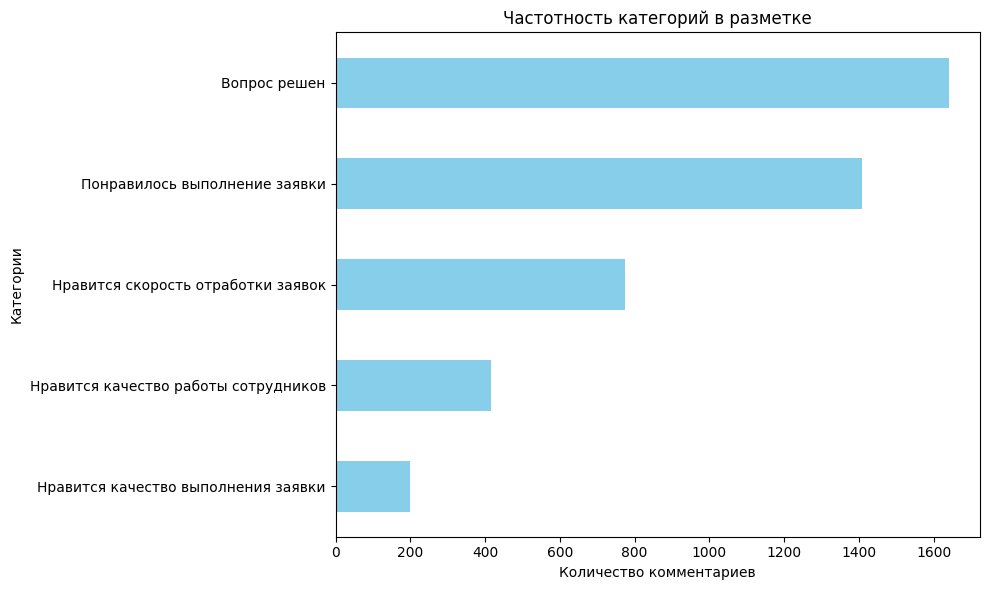

In [12]:
import matplotlib.pyplot as plt

columns = [
    "Нравится скорость отработки заявок",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Понравилось выполнение заявки",
    "Вопрос решен"
]

# Пример, если у тебя есть DataFrame df с бинарными колонками категорий
category_counts = dt_pr[columns].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='skyblue')
plt.title("Частотность категорий в разметке")
plt.xlabel("Количество комментариев")
plt.ylabel("Категории")
plt.tight_layout()
plt.show()

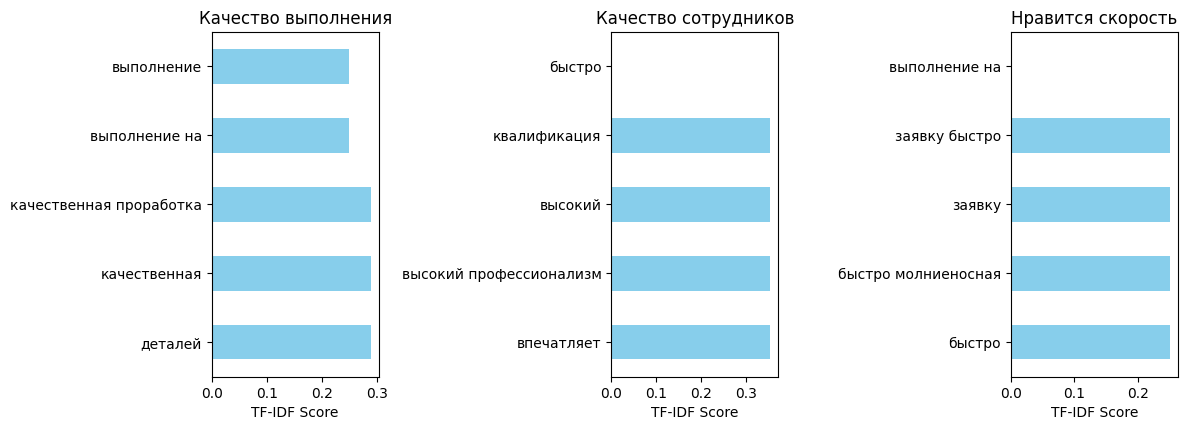

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Синтетические данные (замените своими реальными данными)
data = {
    'text': [
        # Категория 1: Скорость
        'обработали заявку быстро, молниеносная реакция', 
        'скорость обработки превзошла ожидания',
        
        # Категория 2: Качество выполнения
        'качественная проработка деталей заявки',
        'выполнение на высшем уровне',
        
        # Категория 3: Качество сотрудников
        'сотрудник проявил высокий профессионализм',
        'квалификация персонала впечатляет',
    ],
    'category': [
        'Нравится скорость', 'Нравится скорость',
        'Качество выполнения', 'Качество выполнения',
        'Качество сотрудников', 'Качество сотрудников',
    ]
}

df = pd.DataFrame(data)

# Настройка TF-IDF с русскими стоп-словами
tfidf = TfidfVectorizer(
    stop_words=['очень', 'что', 'это', 'как', 'заявка', 'заявки'],
    max_features=15,
    ngram_range=(1, 2)
)

# Применение TF-IDF
tfidf_matrix = tfidf.fit_transform(df['text'])

# Создание DataFrame с весами
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=df['category']
)

# Группировка и усреднение по категориям
result = tfidf_df.groupby(level=0).mean().T.sort_values(by='Нравится скорость', ascending=False)

# Визуализация
plt.figure(figsize=(12, 8))
for idx, category in enumerate(result.columns):
    top_words = result[category].nlargest(5)
    plt.subplot(2, 3, idx+1)
    top_words.plot(kind='barh', color='skyblue')
    plt.title(category)
    plt.xlabel('TF-IDF Score')

plt.tight_layout()
plt.show()

In [ ]:
df = dt_pr.drop(columns=['annotator', 'annotation_id', 'created_at', 'lead_time', 'updated_at'], axis=1)

df.head(5)

,categories,comment,id,rating,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,Вопрос решен,спасибо,2945792,5,NaN,NaN,NaN,NaN,NaN
1,"{""choices"":[""Понравилось выполнение заявки"",""В...",спасибо!,3234340,5,NaN,NaN,NaN,NaN,NaN
2,"{""choices"":[""Понравилось выполнение заявки"",""В...",Отлично,3380332,5,NaN,NaN,NaN,NaN,NaN
3,"{""choices"":[""Нравится скорость отработки заяво...",Благодарю за оперативное решение проблемы !,3381812,5,NaN,NaN,NaN,NaN,NaN
4,"{""choices"":[""Нравится качество работы сотрудни...",Прекрасный специалист! Побольше таких,3461991,5,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Столбцы:", df.columns.tolist())

source_col = "categories"

columns = [
    "Нравится скорость отработки заявок",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Понравилось выполнение заявки",
    "Вопрос решен"
]

df[source_col] = df[source_col].fillna("").astype(str)

for col in columns:
    df[col] = df[source_col].str.contains(col, regex=False).astype(int)

print(df.head())

Столбцы: ['categories', 'comment', 'id', 'rating', 'Вопрос решен', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Нравится скорость отработки заявок', 'Понравилось выполнение заявки']
                                          categories  \
0                                       Вопрос решен   
1  {"choices":["Понравилось выполнение заявки","В...   
2  {"choices":["Понравилось выполнение заявки","В...   
3  {"choices":["Нравится скорость отработки заяво...   
4  {"choices":["Нравится качество работы сотрудни...   

                                        comment       id  rating  \
0                                       спасибо  2945792       5   
1                                      спасибо!  3234340       5   
2                                      Отлично   3380332       5   
3  Благодарю за оперативное решение проблемы !   3381812       5   
4         Прекрасный специалист! Побольше таких  3461991       5   

   Вопрос решен  Нравится качество вы

In [ ]:
df = df.to_csv('Test данные.csv', index=False)

NameError: name 'df' is not defined

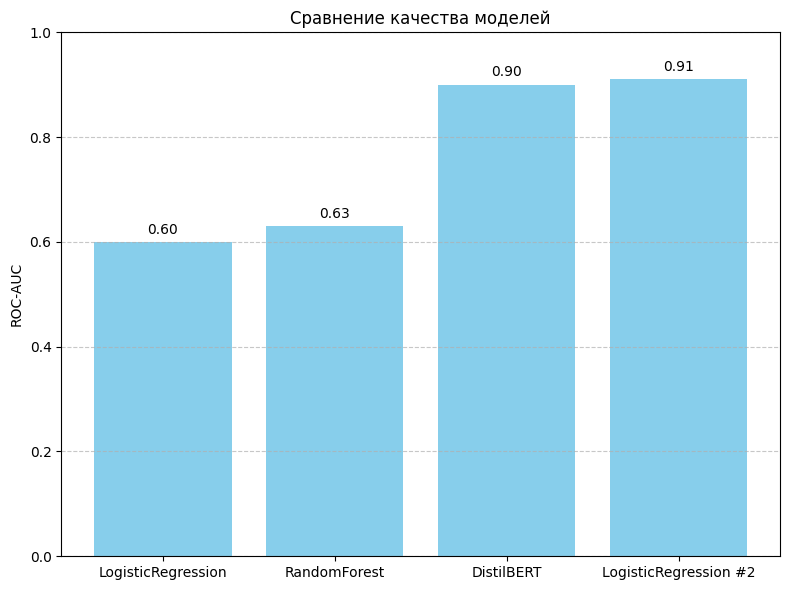

In [16]:
import matplotlib.pyplot as plt

# Данные
model_names = ["LogisticRegression", "RandomForest", "DistilBERT", "LogisticRegression #2"]
scores = [0.60, 0.63, 0.90, 0.91]  # Например, ROC-AUC или R²

# Построение графика
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, scores, color='skyblue')

# Добавляем значения сверху столбиков
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

# Оформление
plt.title("Сравнение качества моделей")
plt.ylabel("ROC-AUC")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
